## 1.

*Recogiendo los datos de coronavirus de la página https://ourworldindata.org/coronavirus-source-data* 

A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

En este caso, utilizaremos las columnas:

- Nuevos casos
- Nuevos fallecidos
- Población
- Fallecidos totales
- Casos totales

La fecha debe estar en el índice.

1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

2. Elimina la columna "Población".

3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

## Tengo el mismo problema con este que con el anterior de crime..... No se como combinar errores de validacion y entrenamiento con una grafica

https://pbpython.com/groupby-agg.html

In [134]:
import csv
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [3]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97385,ZWE,Africa,Zimbabwe,2021-06-17,40927.0,371.0,204.429,1647.0,7.0,3.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97386,ZWE,Africa,Zimbabwe,2021-06-18,41335.0,408.0,235.286,1656.0,9.0,3.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97387,ZWE,Africa,Zimbabwe,2021-06-19,41628.0,293.0,253.714,1666.0,10.0,4.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97388,ZWE,Africa,Zimbabwe,2021-06-20,41779.0,151.0,260.000,1672.0,6.0,5.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [25]:
agg_func_math = {
    'total_deaths':
    ['max']
}
df1 = data.groupby(['location']).agg(agg_func_math)

#sort_values(by=['total_deaths'],ascending=False)
df1.sort_values(by=('total_deaths', 'max'), ascending=False).head(27)



,total_deaths
,max
location,
World,3873255.0
Europe,1095946.0
South America,973374.0
North America,896311.0
Asia,768538.0
European Union,736200.0
United States,602092.0
Brazil,502586.0


In [30]:
esp = data.loc[data['location'] == "Spain"]
esp = esp[["date", "location", "new_cases", "total_cases", "new_deaths", "total_deaths"]]
esp = esp.set_index('date')
esp

,location,new_cases,total_cases,new_deaths,total_deaths
date,,,,,
2020-02-01,Spain,1.0,1.0,NaN,NaN
2020-02-02,Spain,0.0,1.0,NaN,NaN
2020-02-03,Spain,0.0,1.0,NaN,NaN
2020-02-04,Spain,0.0,1.0,NaN,NaN
2020-02-05,Spain,0.0,1.0,NaN,NaN
...,...,...,...,...,...
2021-06-17,Spain,4197.0,3753228.0,19.0,80634.0
2021-06-18,Spain,4214.0,3757442.0,18.0,80652.0
2021-06-19,Spain,0.0,3757442.0,0.0,80652.0


In [67]:
tc = esp["total_cases"]
td = esp["total_deaths"]
nc = esp["new_cases"]
nd = esp["new_deaths"]
esp['date'] = esp.index
dt = esp["date"]

In [84]:
totals = esp[["date", "total_cases", "total_deaths"]]
news = esp[["date", "new_cases", "new_deaths"]]

<Figure size 720x360 with 0 Axes>

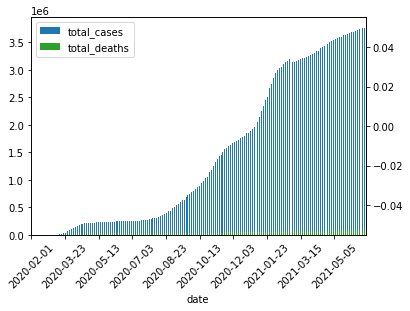

In [99]:
plt.figure(figsize=(10, 5))
ax = esp.plot(x="date", y="total_cases", kind="bar")
ax1 = ax.twinx()
esp.plot(x="date", y="total_deaths", kind="bar", ax=ax, color="C2")
plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=6)
ax.tick_params(axis='x', rotation=45)


In [119]:
tc = esp["total_cases"]
td = esp["total_deaths"]
nc = esp["new_cases"]
nd = esp["new_deaths"]
esp['date'] = esp.index
dt = esp["date"]

In [118]:
totals = esp[["date", "total_cases", "total_deaths"]]
news = esp[["date", "new_cases", "new_deaths"]]

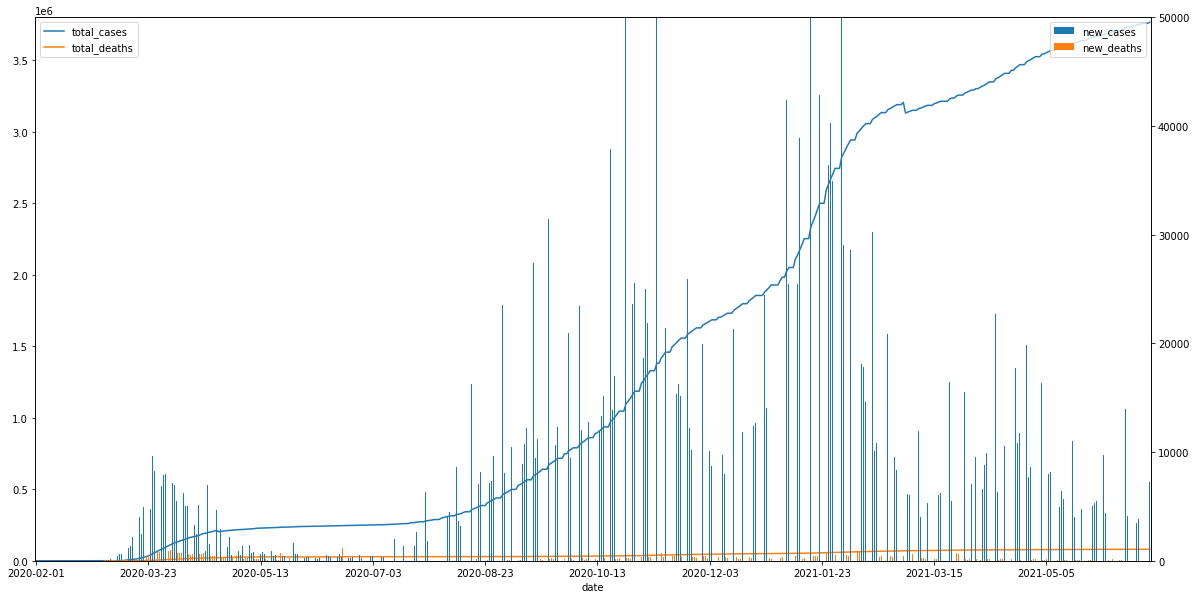

In [117]:
ax = esp.plot(x='date', y=['total_cases', 'total_deaths'], kind="line", figsize=(20,10))
ax1 = ax.twinx()
ax1 = esp.plot(x="date", y=['new_cases', 'new_deaths'], kind="bar", ax=ax1)
ax.set_ylim([0, 3800000])
ax1.set_ylim([0, 50000])
plt.locator_params(axis="x", nbins=10)

In [131]:
esp

,location,new_cases,total_cases,new_deaths,total_deaths,date
date,,,,,,
2020-02-01,Spain,1.0,1.0,NaN,NaN,2020-02-01
2020-02-02,Spain,0.0,1.0,NaN,NaN,2020-02-02
2020-02-03,Spain,0.0,1.0,NaN,NaN,2020-02-03
2020-02-04,Spain,0.0,1.0,NaN,NaN,2020-02-04
2020-02-05,Spain,0.0,1.0,NaN,NaN,2020-02-05
...,...,...,...,...,...,...
2021-06-17,Spain,4197.0,3753228.0,19.0,80634.0,2021-06-17
2021-06-18,Spain,4214.0,3757442.0,18.0,80652.0,2021-06-18
2021-06-19,Spain,0.0,3757442.0,0.0,80652.0,2021-06-19


In [142]:
esp = esp.fillna(0)

In [161]:
X = np.array(esp[["total_cases", "total_deaths", "new_deaths"]])
y = np.array(esp[["new_cases"]])

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [167]:
import numpy as np

from sklearn.model_selection import RepeatedKFold


model = Pipeline([('poly', PolynomialFeatures(degree=5)),
                  ('linear', LinearRegression())])  

poly = model
rskf = RepeatedKFold(n_splits=3, n_repeats=3,random_state=0)

for train_index, val_index in rskf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    poly.fit(X_train, y_train)
    score_val = poly.score(X_val, y_val)
    print("score_val:", score_val)
    print("------------")

score_val: 0.2405475375681605
------------
score_val: -1.719779059942458
------------
score_val: 0.6329558239803952
------------
score_val: 0.6360407151457768
------------
score_val: 0.4873711433001535
------------
score_val: -4.754977177472298
------------
score_val: 0.07289256622341389
------------
score_val: 0.33797624719149955
------------
score_val: 0.256715973460647
------------


In [169]:
ypred = poly.predict(X)